<a href="https://colab.research.google.com/github/Francofus/IMSE_541/blob/main/A3_Homework_chapter_4_Franco_Fus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_1samp
from scipy import stats
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
Table = pd.read_csv('/content/drive/MyDrive/IMSE 541/Table 4E.4.csv', sep=',', na_values=".")
Table

,Unnamed: 0,1,2,3,4,5,6
0,125,2.7,2.6,4.6,3.2,3.0,3.8
1,160,4.6,4.9,5.0,4.2,3.6,4.2
2,200,4.6,2.9,3.4,3.5,4.1,5.1


Problem 4.35
A

In [9]:
data125 = [2.7, 2.6, 4.6, 3.2, 3.0, 3.8]
data160 = [4.6, 4.9, 5.0, 4.2, 3.6, 4.2]
data200 = [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]
stat, p = f_oneway(data125, data160, data200)
print('stat=%.3f, p%.3f'% (stat,p))
if p > 0.05:
  print('Probably same distibution')
else:
  print('Pobably different distribution')

stat=3.586, p0.053
Probably same distibution


In [12]:
data = {
    'data125': [2.7, 2.6, 4.6, 3.2, 3.0, 3.8],
    'data160': [4.6, 4.9, 5.0, 4.2, 3.6, 4.2],
    'data200': [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]
}

df = pd.DataFrame(data)

B

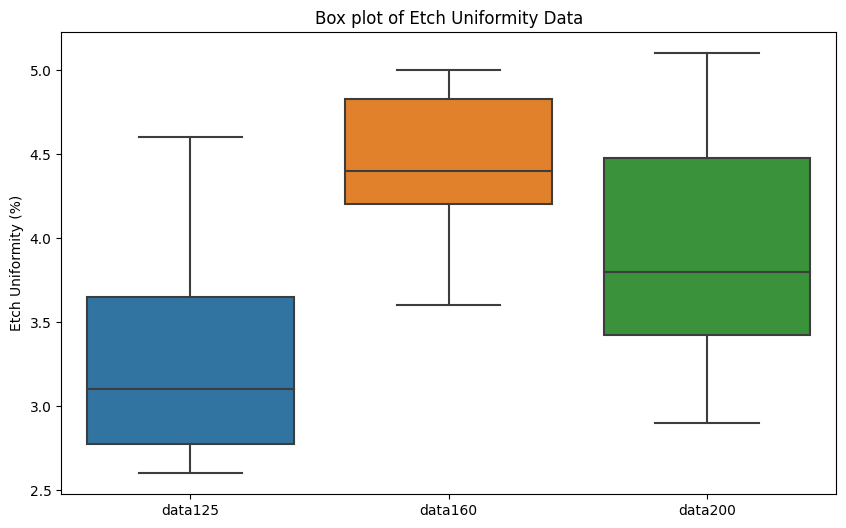

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Box plot of Etch Uniformity Data')
plt.ylabel('Etch Uniformity (%)')
plt.show()

C

In [32]:
df = pd.DataFrame(data)
model = ols('EtchUniformity ~ C(FlowRate)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(FlowRate)  3.647778   2.0  3.585627  0.053365
Residual     7.630000  15.0       NaN       NaN


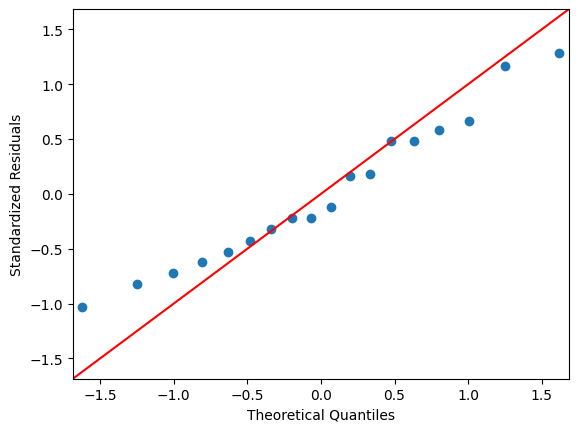

In [34]:
sm.qqplot(model.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


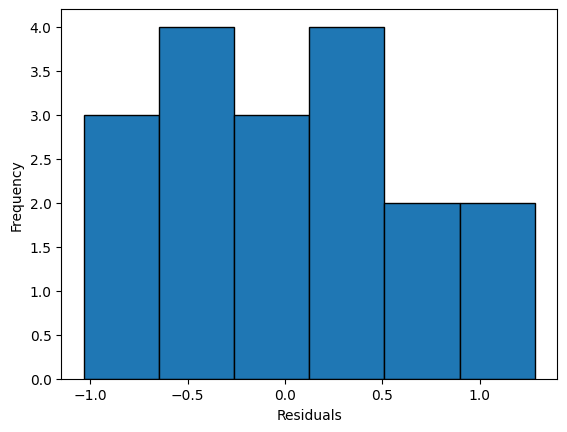

In [35]:
plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [53]:
data = [
    [225, 2000, 90, 100],
    [212, 1800, 94, 95],
    [229, 2400, 88, 110],
    [222, 1900, 91, 96],
    [219, 1600, 86, 100],
    [278, 2500, 96, 110],
    [246, 3000, 94, 98],
    [237, 3200, 90, 100],
    [233, 2800, 88, 105],
    [224, 3400, 86, 97],
    [223, 1800, 90, 100],
    [230, 2500, 89, 104]
]
y = [row[0] for row in data]
X = [row[1:] for row in data]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 27 Sep 2023   Prob (F-statistic):            0.00317
Time:                        04:41:44   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -266.0312     92.674     -2.871      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


y= -266.0312 + 0.0107rpm + 3.1348RoadOctaneNumber + 1.8674Compression

In [55]:
p_values = model.pvalues
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
r_squared = model.rsquared
print("P-values:\n", p_values)
print("F-statistic:", f_statistic)
print("P-value of F-statistic:", f_pvalue)
print("R-squared:", r_squared)

P-values:
 [0.02080898 0.04388296 0.00593659 0.00815546]
F-statistic: 11.115963636360965
P-value of F-statistic: 0.0031699790971881155
R-squared: 0.8065197565314597
